In [92]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from matplotlib.pyplot import figure
import config
from config import cskey


In [93]:
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import chart_studio
chart_studio.tools.set_credentials_file(username='sheri.rosalia', api_key=cskey)
from plotly.offline import plot
chart_studio.plotly
from plotly.offline import iplot


In [94]:
import gmaps
from config import gkey


# Access maps with unique API key
gmaps.configure(api_key=gkey)


In [95]:
# Set max rows displayed in output to 25
pd.set_option("display.max_rows", None)

In [96]:
df=pd.read_csv('../csv/la_rest_types.csv', index_col=False)
df.head()

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Middle Eastern,4.0,349,34.159455,-118.267173,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Barbeque,4.0,349,34.159455,-118.267173,91202
2,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Armenian,4.0,349,34.159455,-118.267173,91202
3,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",,4.0,349,34.159455,-118.267173,91202
4,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Fast Food,2.0,89,33.789873,-118.162498,90804


In [98]:
df=df[df['category_title']!= ' ']
df.head(10)

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Middle Eastern,4.0,349,34.159455,-118.267173,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Barbeque,4.0,349,34.159455,-118.267173,91202
2,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Armenian,4.0,349,34.159455,-118.267173,91202
4,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Fast Food,2.0,89,33.789873,-118.162498,90804
5,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Mexican,2.0,89,33.789873,-118.162498,90804
7,__cvgBooF6k2Ra0nA14NGg,Bottlefish,"11677 San Vicente Blvd Ste 200 Los Angeles, ...",Bars,4.5,274,34.054000,-118.464759,90049
8,__cvgBooF6k2Ra0nA14NGg,Bottlefish,"11677 San Vicente Blvd Ste 200 Los Angeles, ...",Seafood,4.5,274,34.054000,-118.464759,90049
10,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,"1001 Maple Ave Ste 201 Los Angeles, CA 90015",Seafood,3.0,49,34.038311,-118.254250,90015
11,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,"1001 Maple Ave Ste 201 Los Angeles, CA 90015",Mexican,3.0,49,34.038311,-118.254250,90015
13,__GK0tVl6Dygt6BVn2TFrA,China Star Express,"1785 Palo Verde Ave Long Beach, CA 90815",Chinese,3.5,209,33.788383,-118.108055,90815


In [99]:
df.category_title=df.category_title.str.strip()
df.head(10)

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Middle Eastern,4.0,349,34.159455,-118.267173,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Barbeque,4.0,349,34.159455,-118.267173,91202
2,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Armenian,4.0,349,34.159455,-118.267173,91202
4,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Fast Food,2.0,89,33.789873,-118.162498,90804
5,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Mexican,2.0,89,33.789873,-118.162498,90804
7,__cvgBooF6k2Ra0nA14NGg,Bottlefish,"11677 San Vicente Blvd Ste 200 Los Angeles, ...",Bars,4.5,274,34.054000,-118.464759,90049
8,__cvgBooF6k2Ra0nA14NGg,Bottlefish,"11677 San Vicente Blvd Ste 200 Los Angeles, ...",Seafood,4.5,274,34.054000,-118.464759,90049
10,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,"1001 Maple Ave Ste 201 Los Angeles, CA 90015",Seafood,3.0,49,34.038311,-118.254250,90015
11,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,"1001 Maple Ave Ste 201 Los Angeles, CA 90015",Mexican,3.0,49,34.038311,-118.254250,90015
13,__GK0tVl6Dygt6BVn2TFrA,China Star Express,"1785 Palo Verde Ave Long Beach, CA 90815",Chinese,3.5,209,33.788383,-118.108055,90815


In [100]:

dd=df


In [101]:
dt=df
dt=dt.groupby('category_title')
dt.head()

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Middle Eastern,4.0,349,34.159455,-118.267173,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Barbeque,4.0,349,34.159455,-118.267173,91202
2,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Armenian,4.0,349,34.159455,-118.267173,91202
4,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Fast Food,2.0,89,33.789873,-118.162498,90804
5,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Mexican,2.0,89,33.789873,-118.162498,90804
7,__cvgBooF6k2Ra0nA14NGg,Bottlefish,"11677 San Vicente Blvd Ste 200 Los Angeles, ...",Bars,4.5,274,34.054000,-118.464759,90049
8,__cvgBooF6k2Ra0nA14NGg,Bottlefish,"11677 San Vicente Blvd Ste 200 Los Angeles, ...",Seafood,4.5,274,34.054000,-118.464759,90049
10,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,"1001 Maple Ave Ste 201 Los Angeles, CA 90015",Seafood,3.0,49,34.038311,-118.254250,90015
11,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,"1001 Maple Ave Ste 201 Los Angeles, CA 90015",Mexican,3.0,49,34.038311,-118.254250,90015
13,__GK0tVl6Dygt6BVn2TFrA,China Star Express,"1785 Palo Verde Ave Long Beach, CA 90815",Chinese,3.5,209,33.788383,-118.108055,90815


In [102]:
#type rating count
trc=dt['rating'].count()

In [103]:
type(trc)

pandas.core.series.Series

In [104]:
#top trc
ttrc=trc[trc>100]

In [105]:
#median rating
mr=dt['rating'].median()
mr

category_title
Acai Bowls                      4.50
Afghan                          5.00
African                         4.00
American (New)                  4.00
American (Traditional)          3.50
Amusement Parks                 2.75
Arabian                         4.50
Arcades                         2.50
Argentine                       4.00
Armenian                        4.50
Arts & Entertainment            3.50
Asian Fusion                    4.00
Australian                      4.00
Bagels                          4.00
Bakeries                        4.00
Bangladeshi                     3.50
Barbeque                        4.00
Bars                            4.00
Basque                          5.00
Beach Equipment Rentals         3.00
Beaches                         4.50
Bed & Breakfast                 4.50
Beer                            4.00
Beer Bar                        4.00
Beer Gardens                    4.00
Belgian                         4.00
Bike Rentals           

In [106]:
#average (mean) rating
ar=dt['rating'].mean()
ar

category_title
Acai Bowls                      4.269231
Afghan                          5.000000
African                         4.090909
American (New)                  3.800268
American (Traditional)          3.529777
Amusement Parks                 2.750000
Arabian                         4.500000
Arcades                         2.760000
Argentine                       4.107143
Armenian                        4.238462
Arts & Entertainment            3.500000
Asian Fusion                    3.817158
Australian                      4.166667
Bagels                          3.781690
Bakeries                        3.894673
Bangladeshi                     3.700000
Barbeque                        3.881271
Bars                            3.746988
Basque                          5.000000
Beach Equipment Rentals         2.916667
Beaches                         4.500000
Bed & Breakfast                 4.500000
Beer                            4.007463
Beer Bar                        3.995370
B

In [107]:
#type review average
arvc=dt['review_count'].mean()
arvc

category_title
Acai Bowls                       182.173077
Afghan                             1.000000
African                          347.545455
American (New)                   580.029491
American (Traditional)           379.817204
Amusement Parks                  614.500000
Arabian                          120.000000
Arcades                          271.000000
Argentine                        503.035714
Armenian                         343.215385
Arts & Entertainment              38.000000
Asian Fusion                     392.611785
Australian                       234.333333
Bagels                           208.605634
Bakeries                         428.721550
Bangladeshi                       84.400000
Barbeque                         479.182274
Bars                             569.783133
Basque                            85.000000
Beach Equipment Rentals           72.166667
Beaches                           16.000000
Bed & Breakfast                  130.000000
Beer             

In [108]:
#type review median
mdrv=dt['review_count'].median()
mdrv

category_title
Acai Bowls                      111.5
Afghan                            1.0
African                          41.0
American (New)                  339.0
American (Traditional)          220.0
Amusement Parks                 614.5
Arabian                         120.0
Arcades                         118.0
Argentine                       321.0
Armenian                        141.0
Arts & Entertainment             38.0
Asian Fusion                    197.0
Australian                      295.0
Bagels                          182.0
Bakeries                        138.0
Bangladeshi                      61.0
Barbeque                        204.0
Bars                            408.0
Basque                           85.0
Beach Equipment Rentals          46.5
Beaches                          16.0
Bed & Breakfast                 130.0
Beer                            136.0
Beer Bar                        267.5
Beer Gardens                    348.5
Belgian                         288

In [109]:
#cuisine type summary table
ct_df=pd.DataFrame({
    'Cuisine Count': trc,
    'Median Rating': mr,
    'Average Rating': ar,
    'Average Review Count': arvc,
    'Median Review Count': mdrv,
})
ct_df

,Cuisine Count,Median Rating,Average Rating,Average Review Count,Median Review Count
category_title,,,,,
Acai Bowls,52,4.50,4.269231,182.173077,111.5
Afghan,1,5.00,5.000000,1.000000,1.0
African,11,4.00,4.090909,347.545455,41.0
American (New),1119,4.00,3.800268,580.029491,339.0
American (Traditional),1209,3.50,3.529777,379.817204,220.0
Amusement Parks,2,2.75,2.750000,614.500000,614.5
Arabian,2,4.50,4.500000,120.000000,120.0
Arcades,25,2.50,2.760000,271.000000,118.0
Argentine,28,4.00,4.107143,503.035714,321.0


In [110]:
ct_df100=ct_df[ct_df['Cuisine Count']>100]

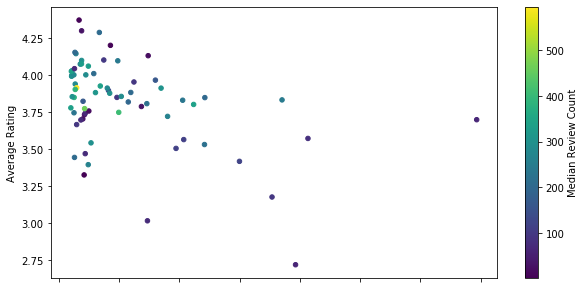

In [111]:
ct100 = ct_df100.plot.scatter(x='Cuisine Count',
                      y='Average Rating',
                      c='Median Review Count',
                      colormap='viridis',
                      figsize=(10,5)
                      )

In [112]:
ct_df100.sort_values(by='Average Rating')

,Cuisine Count,Median Rating,Average Rating,Average Review Count,Median Review Count
category_title,,,,,
Fast Food,1964,2.5,2.718432,108.349796,63.0
Chicken Wings,736,3.0,3.014946,176.483696,75.0
Burgers,1769,3.5,3.175523,235.206897,98.0
Restaurants,211,3.5,3.324645,11.241706,1.0
Diners,245,3.5,3.393878,405.102041,265.0
Pizza,1499,3.5,3.416278,251.763175,120.0
Buffets,131,3.5,3.442748,385.450382,207.0
Chicken Shop,220,4.0,3.468182,267.195455,73.5
Chinese,973,3.5,3.503597,217.507708,116.0


In [113]:
bad_food=ct_df100[ct_df100['Average Rating']<3.5]


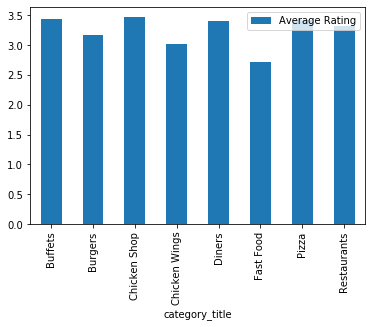

In [114]:
bad_food.plot(kind='bar', y='Average Rating')

In [115]:
good_food=ct_df100[ct_df100['Average Rating']>4.1]
good_food

,Cuisine Count,Median Rating,Average Rating,Average Review Count,Median Review Count
category_title,,,,,
Caterers,190,4.5,4.297368,180.884211,30.0
Food Stands,429,4.5,4.199301,39.874126,6.0
Food Trucks,742,4.5,4.129380,73.055256,20.0
Halal,143,4.0,4.143357,394.251748,255.0
Juice Bars & Smoothies,374,4.0,4.100267,192.323529,99.5
Poke,135,4.0,4.151852,322.214815,204.0
Street Vendors,169,4.5,4.369822,36.893491,6.0
Vegan,337,4.5,4.286350,388.768546,206.0


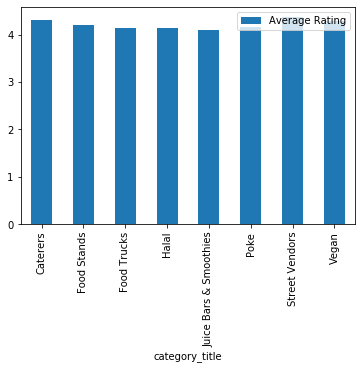

In [119]:
good_food.plot(kind='bar', y='Average Rating')

In [117]:
ct_df500=ct_df[ct_df['Cuisine Count']>500]


In [118]:
ct_df500.sort_values(by='Cuisine Count', ascending=False)

,Cuisine Count,Median Rating,Average Rating,Average Review Count,Median Review Count
category_title,,,,,
Mexican,3466,4.0,3.697346,177.911425,66.0
Sandwiches,2067,3.5,3.570876,234.358007,83.0
Fast Food,1964,2.5,2.718432,108.349796,63.0
Breakfast & Brunch,1852,4.0,3.830994,476.333693,246.0
Burgers,1769,3.5,3.175523,235.206897,98.0
Pizza,1499,3.5,3.416278,251.763175,120.0
Seafood,1212,4.0,3.846535,394.328383,202.0
American (Traditional),1209,3.5,3.529777,379.817204,220.0
American (New),1119,4.0,3.800268,580.029491,339.0


In [55]:
zipdict = {}

zips=[]
total_counts = 0
total_count_per_zip=0
zipcode_count = 0
unique_zip_count=0

for x in dd['zipcodes']:
    
    total_counts = total_counts +1
    
    if x not in zips:
        zips.append(x)
        zipdict[x] = 0
    zipdict[x] = zipdict[x] +1 
    

    
# print(zipdict)  


# print(unique_zip_count)
# print(total_counts)
# print(total_count_per_zip)


In [56]:
# Set max rows displayed in output to 25
pd.set_option("display.max_columns", None)
pd.DataFrame([zipdict])

,91202,90804,90049,90015,90815,90011,92833,90018,90026,92825,90501,90255,90069,91423,90640,90292,90028,90035,90270,90039,90033,90016,90077,90024,90744,91324,90813,91301,90045,90230,90037,90280,90220,90020,90706,90004,90189,90810,90040,90504,91745,90401,90058,91411,91302,90048,90006,90247,90036,90038,90701,90650,90717,90027,90046,90025,90005,90278,90007,90057,90403,90029,90291,91505,90732,91203,91206,90301,90000,90071,90041,92831,90063,90680,90723,90670,90305,90249,92845,90001,90012,92806,90805,90031,90250,90806,90201,90023,90021,92832,91405,91803,92647,90022,92708,90034,90248,90032,91790,91403,90405,91607,92805,91604,91770,92683,90222,90013,90065,90042,90808,90601,90062,90066,90740,90068,90221,90302,90606,91748,90603,92801,90017,90631,91754,90807,90621,90720,91201,90232,91205,90277,90802,91776,90019,90210,90503,90272,90245,90262,90660,91602,90745,90303,92840,90716,90266,92835,90803,90014,90502,90710,90505,90212,90010,90411,90638,91306,90064,91303,90047,90712,90008,90814,90044,90260,CA,90623,91436,90043,91502,91601,90240,92648,90254,90602,90731,90211,91789,90703,91362,91367,91731,90604,90630,92843,90404,90003,90095,90241,92821,90713,91335,92707,91361,91801,90089,90265,91364,90067,90402,90605,91356,92802,90242,91210,90061,Kingdom,90747,94703,92804,91733,90620,90274,91316,92649,92844,43950,91755,91506,91204,90059,91792,92841,90715,91744,91732,90746,90275,91345,90742,60193,90304,11222,90846,96001,90290,90639,91207,91746,92703,90755,90293,90002,91402,91780,91706,95020,92870,91343,91608,90079,90094,91311,92823,91401,91331,92842,91307,91016,74403,91344,90840,91304,91765,91522,90609,90202,90209,91735,10476,90101,91105,91325,91030,43611,90056,90263,93063,90704,91606,90009,91406,10314,90407,91786,21206,90651,91352,92081,91320,90510,95113,93453,91433,91772,92706,92820,91357,90801,91605,92602,91775,91722,90421,91723,92868,60545,92856,90073,61554,91788,92867,3K6,90831,02713,92626,90822,91711,30076,92335,92660,90052,90743,90060,93033,27200,92337,92701,91326,92612,90682,93035,91342,93036,91360,92822,90899,92807,91701,90312,92705,91399,91778,92692,94970,46360,37918,91101,91749,91209,90820,90895,41041,90083,90261,91354,92606,91366,91337,91377,91504,93955,92467,91006
0,57,224,142,515,214,262,140,95,397,6,258,315,337,124,291,236,605,236,102,161,261,172,28,328,175,97,175,156,530,255,177,331,137,376,264,323,24,114,126,111,151,428,82,27,82,340,432,258,468,229,265,274,142,408,403,490,286,151,311,163,175,242,350,177,62,165,81,165,5,153,225,89,154,64,193,139,17,219,40,237,550,19,200,112,303,165,270,233,249,209,13,104,222,329,22,226,174,135,90,152,323,28,114,320,165,241,39,359,156,272,166,150,58,215,139,76,151,81,96,337,109,193,369,268,244,199,273,131,65,278,194,370,457,193,309,237,251,98,304,205,291,121,214,110,72,82,261,42,325,310,73,75,364,146,260,3,204,9,249,62,118,205,101,80,131,124,152,68,102,81,22,212,119,115,199,88,251,116,59,340,217,85,70,64,209,93,127,141,46,232,214,90,50,27,95,182,51,123,169,184,31,127,102,93,169,71,64,4,9,1,179,77,293,76,117,128,123,3,48,53,139,83,50,29,55,87,52,162,76,2,23,2,120,3,7,3,21,8,7,65,3,58,52,44,9,50,53,1,44,10,42,3,47,27,2,18,6,5,16,1,1,12,10,24,1,1,2,1,2,3,3,2,4,20,18,3,17,8,1,10,9,2,32,1,7,3,3,4,6,3,6,8,3,2,1,3,2,3,2,3,12,4,3,5,1,3,9,3,3,1,3,3,3,1,2,1,5,2,3,1,2,3,3,3,3,3,1,1,9,3,2,3,2,6,9,3,1,4,3,3,2,1,2,3,3,2,1,3,2,3,1,1,1,3,1,3,2,2,1,3,3,3,2,2,2


In [57]:

zip_series=pd.Series(zipdict).to_frame(name="zipcount")
zip_series

,zipcount
91202,57
90804,224
90049,142
90015,515
90815,214
90011,262
92833,140
90018,95
90026,397
92825,6


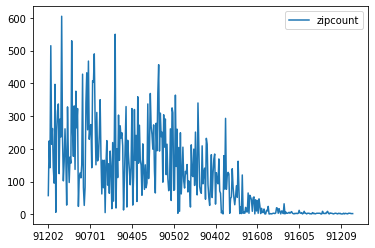

In [58]:
zip_series.plot(kind='line',)

In [59]:
zip_series.describe()

,zipcount
count,365.000000
mean,113.260274
std,123.494453
min,1.000000
25%,3.000000
50%,76.000000
75%,184.000000
max,605.000000


In [60]:
# change series to df later
# s = pd.Series(["a", "b", "c"],
#               name="vals")aa
# s.to_frame()

In [61]:
dd.sample()

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
4079,2zd9c_5UUKrxljfnthOFGQ,Tacos al Vapor,"2735 E Artesia Blvd Long Beach, CA 90805",Food Trucks,2.5,2,33.874944,-118.160273,90805


In [62]:
cuisinedict = {}

cuisines=[]
cuisine_counts = 0
total_count_per_zip=0
cuis_count = 0
unique_zip_count=0

for c in df['tit1']:
    
    cuisine_counts = cuisine_counts +1
    
    if c not in cuisines:
        cuisines.append(c)
        cuisinedict[c] = 0
    cuisinedict[c] = cuisinedict[c] +1 
    

    
print(cuisinedict)  


# print(unique_zip_count)
# print(total_counts)
# print(total_count_per_zip)

KeyError: 'tit1'

In [ ]:

cuisine_series=pd.Series(cuisinedict).to_frame(name="cuisine count")
cuisine_series

In [ ]:
# use inplace=True to get rid of range level_0
cuisine_series.reset_index(drop=False,) 

In [ ]:
cuisine_series.describe()

In [ ]:
cuisine_series.plot()

In [ ]:
cuisine_series.info()

In [ ]:
size_bins=[0, 75, 200, 400, 600, 1000, 4000 ]

In [ ]:

group_names = ["Mini (<75)", "Low (75-200)","Medium (200-400)", "Large (600-1000)", "XLarge (600-1000)", "Jumbo (1000-2000)",]





In [ ]:
# Categorize counts bins.
cuisine_series['cuisine bins'] = pd.cut(cuisine_series['cuisine count'], size_bins, labels=group_names)

cuisine_series.head()

In [ ]:
cuisine_series.plot(kind='scatter', x='cuisine bins', y='cuisine count')

In [ ]:
cuisine_series.reset_index(drop=False, inplace=True) 

In [ ]:
cuisine_series.columns.to_list()

In [ ]:
cuisine_series['type']=cuisine_series['index']

In [ ]:
cuisine_series.columns.to_list()

In [ ]:
cuisine_series.head()

In [ ]:
table = pd.pivot_table(cuisine_series, values='cuisine count', index=['cuisine bins', ],
                    columns=['type'], aggfunc=np.sum)

In [ ]:
pd.set_option("display.max_columns", None)

table

In [ ]:
#bin_averages
ba=cuisine_series.groupby(['cuisine bins']).mean()['cuisine count'].map("{:.1f}".format)
ba

In [ ]:
#bin sums
bs=cuisine_series.groupby(['cuisine bins']).sum()['cuisine count']
bs

In [ ]:
#bin median
bd=cuisine_series.groupby(['cuisine bins']).median()['cuisine count']
bd

In [ ]:
#total count per bin
tot=cuisine_series.groupby(['cuisine bins']).sum()
tot

In [ ]:
#cuisine type number count
cnct=cuisine_series.groupby(['type']).sum()
cnct


In [ ]:
cnct.info()

In [ ]:
cnct.columns.to_list()

In [ ]:
tot.columns.to_list()
tot.info()

In [ ]:
cbin_df=cuisine_series

In [ ]:
# cbin.reset_index()

In [ ]:
# summary=pd.DataFrame({
#     'Average # of Restaurants': ba, 
#     'Median # of Restaurants': bd,
#     'Sum # of Restaurants': bs,
#     'Percentage # of Restaurants': ps,
# })

In [ ]:
# summary


In [ ]:
# cca=cuisine_count median
ccd=cuisine_series['cuisine count'].median()
ccd

In [ ]:
#ccs=sum
ccs=cuisine_series['cuisine count'].sum()
ccs

In [ ]:
#cca average
cca=cuisine_series['cuisine count'].mean()
cca

In [ ]:
dd=df
zips=dd[['zipcodes', 'id', 'tit1', 'rating', 'review_count']]
zips=zips.groupby(['zipcodes']).median().sort_values('review_count', ascending=False)
zips.head()


In [ ]:
# plot data
fig, ax = plt.subplots(figsize=(15,9))
# use unstack()
dd.groupby(['zipcodes','tit1']).count()['review_count'].unstack().plot(ax=ax)

In [ ]:

restzip=dd[[ 'id', 'zipcodes','tit2', 'rating', 'review_count']]
restzip=zips.groupby(['zipcodes']).mean().sort_values('review_count', ascending=False)
restzip.head()


In [ ]:
restzip.columns.to_list()
    

In [ ]:
# Get the number of rides for urban cities.
zipcount = dd.groupby(["zipcodes"]).count()["id"]
zipcount.head()

In [ ]:
zips.reset_index(level='zipcodes')


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]

In [ ]:
dd.sample()

In [ ]:
ax2 = dd.plot.scatter(x='zipcodes',
                      y='review_count',
                      c='rating',
                      colormap='viridis'
                      )

In [ ]:
# df.info()

In [ ]:
# df['name'].value_counts()

In [ ]:
#convert to category types
for col in ['id', 'name', 'address', 'tit1', 'zipcodes']:
    df[col] = dd[col].astype('category')

In [ ]:
dd.sample()

In [ ]:
# df.info()

In [ ]:
# df.isnull()

In [ ]:
# df.replace(' ', np.nan, inplace=True)

In [ ]:
# df.isnull()

In [ ]:
# df.dropna(inplace=True)

In [ ]:
# df.reset_index(drop=True)
# df.sample(2)

In [ ]:
# df.isnull()

In [ ]:
#total number of restaurants by unique ids
# rt_ct = rt['id'].nunique()
# rt_ct

In [ ]:
#how many types of food


In [ ]:
#list of types
#how many types of food

# rt_list = rt['tit1'].value_counts()
# print(rt_list.to_string())

In [ ]:
laZips=df[df.zipcodes.str.startswith('9')]
laZips.sample()
laZips.to_csv('../csv/LA_Rest_2_food_types.csv', index=False)

In [ ]:
# mapdf=aT[(aT["zipcodes"]=='90017') & (aT["rating"]>= 3.5)]
# mapdf.sample()

In [ ]:

unique_types = df["tit1"].unique()
# unique_types.tolist()





In [ ]:
# grouptype.index.tolist()

In [ ]:
# create data

# food_types=df.index.tolist()

# labels = [f"Restaurant name: {name}" for name in food_types]

# x=grouptype.review_count,
# y=grouptype.zipcodes,
# z=grouptype.rating,
# # z=z*z
# z=z

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# # Change color with c and alpha. I map the color to the X axis value.
# plt.scatter(x, y, s=z, c=y, cmap="Reds", alpha=0.4, edgecolors="grey", linewidth=.25)
 
# # Add titles (main and on axis)
# plt.xlabel("Number of Restaurants Per Zipcode")
# plt.ylabel("Average Rating")
# plt.title("Restaurants by ZipCode, Rating and Review Count")
 
# plt.show()

In [ ]:
tit2=df.sort_values(["tit2"], ascending=False)
tit2.sample()

In [ ]:

# tit1 = df.drop(['lat', 'lon'], axis=1, inplace=True)


In [ ]:
tit1=df.sort_values(["tit1"], ascending=False)

In [ ]:
# df.sample()

In [ ]:
# ax = tit1.plot.hist(bins=12, alpha=0.5) # or... ax = df.plot.hist(bins=25, stacked=True)

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
ax = tit1.plot.hist(bins=12, stacked=True)

In [ ]:
zipcount=df.groupby(["review_count"])['zipcodes'].count()

zipcount.head()

In [ ]:
zipcount=df.sort_values(["zipcodes"], ascending=False)
zipcount.head()

In [ ]:

res=df.groupby('rating').aggregate(['min', np.median, max])
res.plot()




In [ ]:
# types=df.tit1.value_counts()
# toptypes=types.head(20)

In [ ]:

types=df.iloc[df.groupby('tit1').tit1.transform('size').mul(-1).argsort(kind='mergesort')]



In [ ]:
types.head()

In [ ]:
gb = types.groupby(['tit1']).mean()
gb.head()

In [ ]:
gb.plot.scatter(x='rating', y='review_count',)

In [ ]:
scatter_matrix(gb, figsize=(10,10))

In [ ]:
# %pip install mpld3
import mpld3


In [ ]:
for name in gb.index:
    print(name)

In [ ]:
food_types=gb.index.tolist()
food_types

In [ ]:
zip_count = df.groupby('zipcodes').size()
zip_count

In [ ]:
tit=df.groupby(['tit1',], as_index=False).sum()

In [ ]:
tit.columns.to_list()

In [ ]:
# rev_ov_100=tit[(tit["review_count"]>=500) & (tit["rating"]== 5)]


In [ ]:
rev_cen=tit[(tit["review_count"]>=500)]
rev_cen

In [ ]:
figsize=10,10
rev_cen.plot.scatter(x='tit1', y='rating', figsize=figsize)

In [ ]:
"""Interactive scatter plot using MPLD3 with API inspired by seaborn."""
import mpld3
import numpy as np
import pandas
import matplotlib
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt


def scatterplot(data=None, x=None, y=None, cat=None, sizecat=None, labels=None,
                cmap='Set1', alpha=0.5, figsize=(12, 10), markersize=100,
                graybg=False):
    """Create scatter plot with labels as tooltips shown on mouse-over.
    Input is a DataFrame, the other parameters are column names and tweaks.
    :param x, y: column names which hold the x, y coordinates, or array-likes.
    :param cat: (column name for) category labels of data points; each category
        is drawn in a different color and appears in the legend.
    :param sizecat: numeric data to display by adjusting the size of data
        points.
    :param labels: labels for individual data points shown as tooltips.
    :param cmap: name of a matplotlib colormap.
    :param alpha: level of transparency of data points.
    :param figsize: size of plot (width, height).
    :param markersize: if sizecat is not given, the default size of data
        points.
    :param graybg: use gray instead of white background.
    :returns: a Figure.
    Usage:
    >>> scatterplot(df)  # use first two columns as x, y coordinates
    >>> scatterplot(x=[...], y=[...])  # plot given array-likes
    >>> scatterplot(df, x='col1', y='col1', ...)  # specify column names to use
    >>> mpld3.display()  # display figure in e.g., notebook
    """
    fig, ax = plt.subplots(
        subplot_kw=dict(axisbg='#EEEEEE') if graybg else None,
        figsize=figsize)
    if data is None:
        data = pandas.DataFrame({'x': x, 'y': y}, index=labels)
        x, y = 'x', 'y'
    elif x is None and y is None:
        x, y = data.columns[~data.columns.isin([cat, sizecat, labels])][:2]
    if isinstance(cat, str):
        cat = data[cat]
    if isinstance(sizecat, str):
        sizecat = data[sizecat]
    # labels for categories:
    if cat is None:
        cat = np.ones(len(data))
        categorylabels = [1]
    else:
        categorylabels = cat.unique()
    # labels for data points:
    if labels is None:
        labels = data.index
    elif isinstance(labels, str):
        labels = data[labels]
    # colors for categories:
    norm = matplotlib.colors.Normalize(vmin=0, vmax=len(categorylabels))
    mappable = cm.ScalarMappable(norm, cmap)
    mappable.set_array(range(len(categorylabels)))
    colors = mappable.to_rgba(range(len(categorylabels)))

    for a, c in zip(categorylabels, colors):
        scatter = ax.scatter(
                data[cat == a][x],
                data[cat == a][y],
                color=c,
                s=markersize if sizecat is None
                    else (5 * sizecat[cat == a] ** 2),
                alpha=alpha,
                label=a)
        tooltip = mpld3.plugins.PointLabelTooltip(
                scatter,
                labels=[labels[n] for n in (cat == a).nonzero()[0]])
        mpld3.plugins.connect(fig, tooltip)
    # plt.title(cat)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    # work around limitation of mpld3 wrt markers in legends
    ax.legend(loc='best', framealpha=0, numpoints=1, handles=[
            mlines.Line2D(range(1), range(1), color="white", marker='o',
                markerfacecolor=c, label=a)
            for a, c in zip(categorylabels, colors)])
    return fig

In [ ]:
scatterplot(data=tit, x='rating', y='review_count', cat=None, sizecat=None, labels=None,
                cmap='Set2', alpha=0.5, figsize=(12, 10), markersize=100,
                graybg=False)

In [ ]:
tacos=df[(df["review_count"]>=100) & (df["tit1"]== 'Tacos')]
tacos.head()


In [ ]:

lat=list(tacos['lat'])
lon=list(tacos['lon'])

zip(lat, lon)
coordinates = [x for x in zip(lat, lon)]



# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
rest_name=tacos['name'].tolist()
# Assign the marker layer to a variable
info_box_content=[f"Restaurant name: {name}" for name in rest_name]
markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )
heat_layer = gmaps.heatmap_layer(coordinates,  weights=tacos['rating']+5,
                                 dissipating=False, max_intensity=5,
                                 point_radius = .018)
# Add the layer to the map
fig.add_layer(heat_layer)
fig.add_layer(markers)
fig



In [ ]:

df1 = df.set_index(keys='tit1')
s = df1.groupby(level=0)['review_count'].sum() 
dfg = df1.groupby(level=0).sum()
dfg.sample()

In [ ]:
# top_rate['category_title'].value_counts()

In [ ]:
##install chart studio an cufflinks

# ! pip install chart_studio
# ! pip install --user cufflinks

In [ ]:
# ! pip install --user cufflinks

In [ ]:
# tit=df.groupby(['tit1',], as_index=False).sum()

In [ ]:
# top_rate['category_title'].value_counts().iplot(kind='bar')

In [ ]:
# top_rate.set_index('category_title', inplace=True)

In [ ]:
# top_rate.groupby().value_counts()


In [ ]:
# top_rate.drop(['Party Supplies', 'Cannabis Dispensaries', 'Vitamins & Supplements', 'Wine & Spirits', 'Wedding Planning'
#               'Ice Cream & Frozen Yogurt', 'Acai Bowls', 'Personal Chefs', 'Do-It-Yourself Food', 'Cinema', 'Whiskey Bars', 
#                'Popcorn Shops', 'Pubs', 'Butcher'])



In [ ]:
# top_rate.head()

In [ ]:
#kinda working... need to fix
# data  = go.Data([
#             go.Bar(
#               y = top_rate['id'],
#               x = top_rate['category_title'].value_counts(),
#               orientation='h'
#         )])
# layout = go.Layout(
#         height = 1000,
#         margin=go.Margin(l=20),
#         title = "Contributing Factors for Vehicle Collisions in 2015"
# )
# fig  = go.Figure(data=data, layout=layout)
# py.iplot(fig)


In [ ]:
# top_rate['category_title'].value_counts()

In [ ]:
persian=df[(df["rating"]>= 1) & (df["tit1"]== 'Persian'+"/"+'Iranian')]
persian


In [ ]:
lat=list(persian['lat'])
lon=list(persian['lon'])

zip(lat, lon)
coordinates = [x for x in zip(lat, lon)]



# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}


fig = gmaps.figure(layout=figure_layout)
rest_name=persian['name'].tolist()
rating=persian['rating'].tolist()
# Assign the marker layer to a variable
info_box_content=[f"Restaurant name: {name}" for name in rest_name]
markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )
heat_layer = gmaps.heatmap_layer(coordinates,  weights=persian['rating']+5,
                                 dissipating=False, max_intensity=5,
                                 point_radius = .018)
# Add the layer to the map
fig.add_layer(heat_layer)
fig.add_layer(markers)
fig

In [ ]:
# bestR=aT[(aT["review_count"]>=500) & (aT["rating"]== 5)]

In [ ]:
# bestR=aT[(aT["review_count"]>=500) & (aT["rating"]== 5)]

# lat=list(bestR['lat'])
# lon=list(bestR['lon'])

# zip(lat, lon)
# coordinates = [x for x in zip(lat, lon)]



# # Customize the size of the figure
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }

# fig = gmaps.figure(layout=figure_layout)
# rest_name=bestR['name'].tolist()
# # Assign the marker layer to a variable
# info_box_content=[f"Restaurant name: {name}" for name in rest_name]
# markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )
# heat_layer = gmaps.heatmap_layer(coordinates, weights=bestR['rating']-5, 
#                                  dissipating=False, max_intensity=5,
#                                  point_radius = .018)
# # Add the layer to the map
# fig.add_layer(heat_layer)
# fig.add_layer(markers)
# fig